In [14]:
import os
import sys
from pathlib import Path

In [15]:
# Find the project root (assuming a 'src' folder or 'README.md' exists at root)
def find_project_root(marker_dirs=['src', 'config'], marker_files=['README.md']):
    current_path = Path(os.getcwd())
    while current_path != current_path.parent:
        if any((current_path / m).is_dir() for m in marker_dirs) or \
           any((current_path / m).is_file() for m in marker_files):
            return current_path
        current_path = current_path.parent
    return None

project_root = find_project_root()
if project_root is None:
    raise FileNotFoundError("Project root not found! Please ensure 'src' or 'README.md' exists in a parent directory.")

# Add the 'src' directory to the Python path
sys.path.insert(0, str(project_root / 'src'))

In [16]:
from experiment_functions import (
    run_single_slit_experiment,
    run_double_slit_experiment,
    run_circular_aperture_experiment
)

--- Running Single Slit Experiment from single_slit_basic.json ---
  Simulation Params: Wavelength=500.0nm,           Lx=50.0mm, Ly=10.0mm, Z=0.50m
  Slit: Width=100.0um,           Height=1.0mm


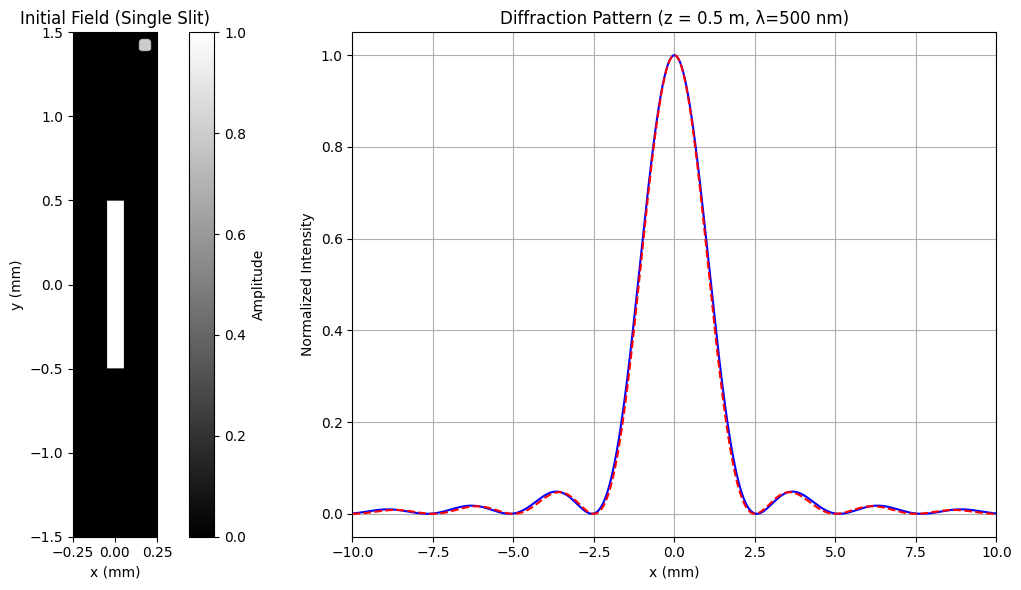

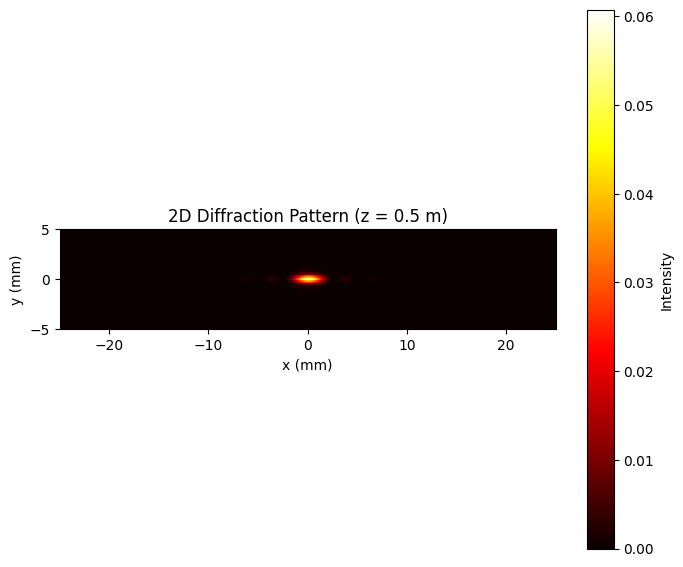

In [17]:
run_single_slit_experiment("single_slit_basic.json")


--- Running Double Slit Experiment from double_slit_interference.json ---
  Simulation Params: Wavelength=632.8nm,           Lx=50.0mm, Ly=30.0mm, Z=0.50m
  Slits: Width=40.0um,           Height=1.0mm, Separation=200.0um


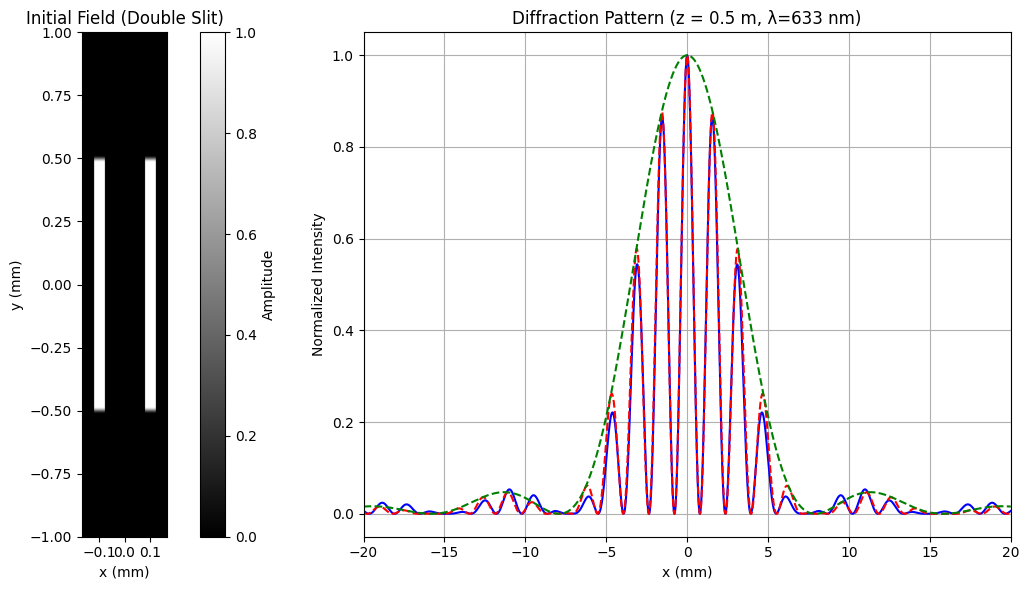

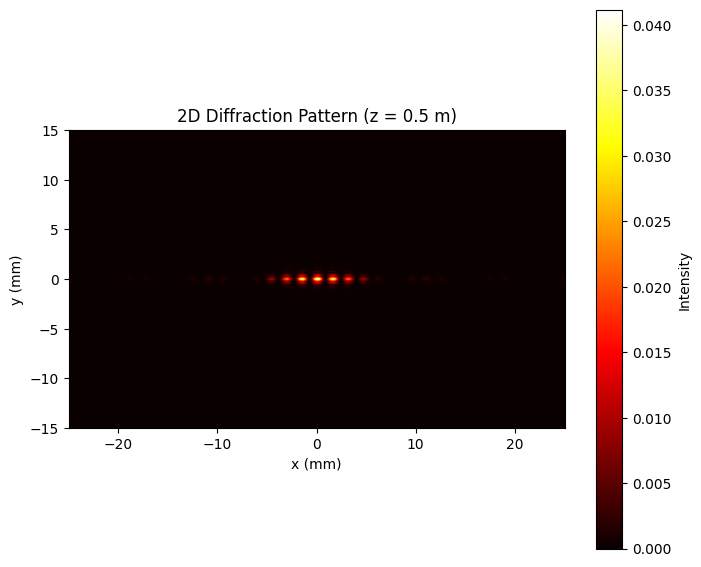

In [22]:
run_double_slit_experiment("double_slit_interference.json")

--- Running Circular Aperture Experiment from circular_aperture_airy.json ---
  Simulation Params: Wavelength=550.0nm,           Lx=40.0mm, Ly=40.0mm, Z=0.50m
  Aperture: Radius=0.50mm


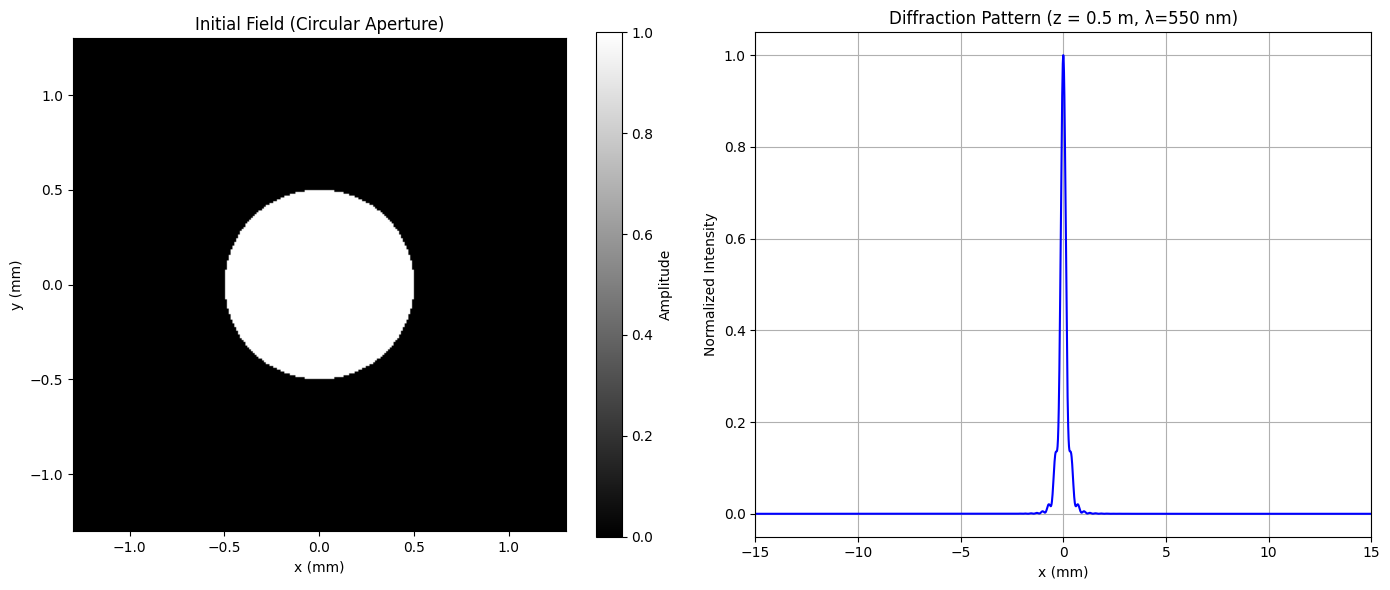

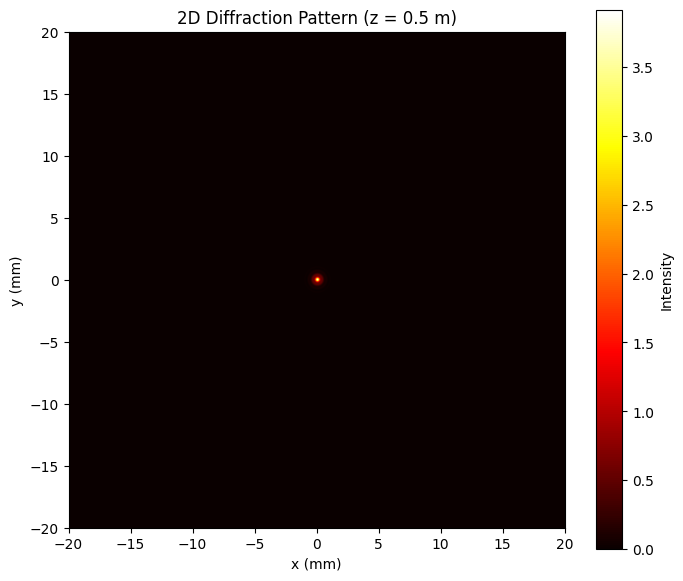

In [23]:
run_circular_aperture_experiment("circular_aperture_airy.json")
